In [57]:
# Maged Eid - SEP 6DM3 - Course Final Project
# Load the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [58]:
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")


In [59]:
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [60]:
# Data Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head(), '\n')


Number of Rows:  918
Number of Columns:  12 

SubSet of Data:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0   



(688, 11)
(688,)


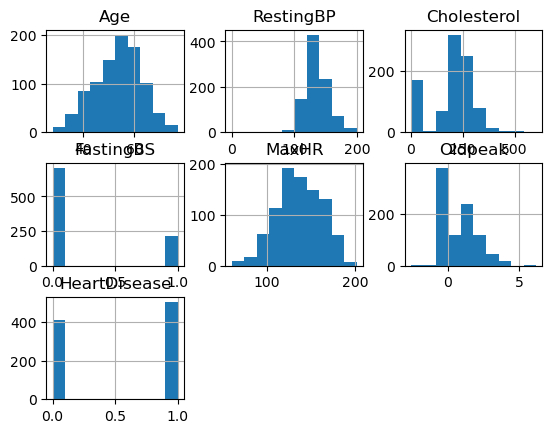

In [61]:
# Data Split (Training 75% of the data & Test 25% of the data)
x = data.drop('HeartDisease', axis=1).values
y = data['HeartDisease'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

# Data histograms
data.hist()
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.71      0.70        98
           1       0.78      0.75      0.76       132

    accuracy                           0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.74      0.73      0.74       230

Accuracy of KNN Algorithm:  73.47826086956522
Training time: 0.0080 seconds
Testing time: 0.0080 seconds
Cross Validation Results:
Test Scores: [0.76086957 0.73913043 0.77536232 0.72992701 0.71532847]
Mean Test Score: 0.7441235586586268


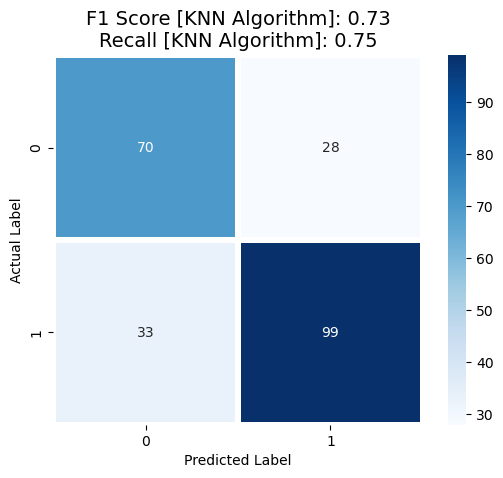

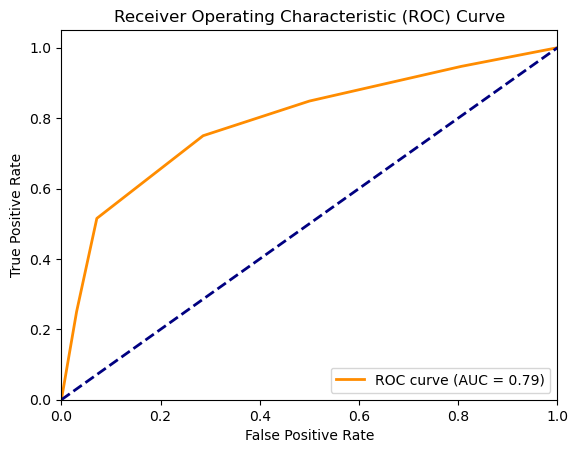

In [115]:
# KNN
# KNN
# KNN

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Cross-validation
cv_results = cross_validate(knn, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = knn.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of KNN Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_knn = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [KNN Algorithm]: {f1_score_knn:.2f}\n'
          f'Recall [KNN Algorithm]: {recall_knn:.2f}', size=14, color='black')
plt.show()

# Predict probabilities for test data
y_prob = knn.predict_proba(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        98
           1       0.89      0.80      0.84       132

    accuracy                           0.83       230
   macro avg       0.83      0.84      0.83       230
weighted avg       0.84      0.83      0.83       230

Accuracy of Naive Bayes Algorithm:  83.04347826086956
Training time: 0.0000 seconds
Testing time: 0.0080 seconds
Cross Validation Results:
Test Scores: [0.86231884 0.86231884 0.84057971 0.8540146  0.8540146 ]
Mean Test Score: 0.8546493176769279


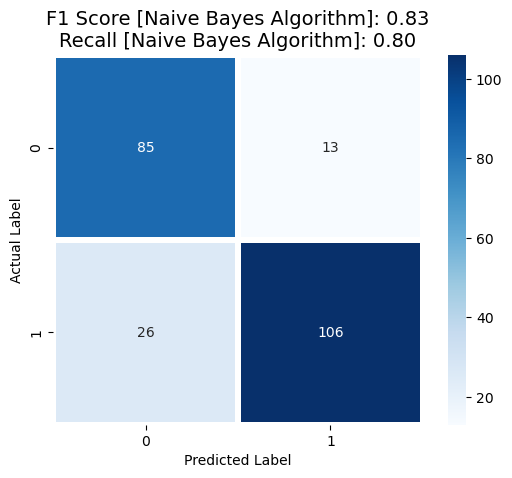

In [116]:
# Naive Bayes
# Naive Bayes
# Naive Bayes


import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Cross-validation
cv_results = cross_validate(gnb, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
gnb.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = gnb.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of Naive Bayes Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_nb = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_nb = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_nb = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_nb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [Naive Bayes Algorithm]: {f1_score_nb:.2f}\n'
          f'Recall [Naive Bayes Algorithm]: {recall_nb:.2f}', size=14, color='black')
plt.show()



C:\Users\maged\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        98
           1       0.83      0.84      0.84       132

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230

Accuracy of Decision Tree Algorithm:  81.30434782608695
Training time: 0.0080 seconds
Testing time: 0.0000 seconds
Cross Validation Results:
Test Scores: [0.76811594 0.82608696 0.7826087  0.75912409 0.72262774]
Mean Test Score: 0.7717126838040833


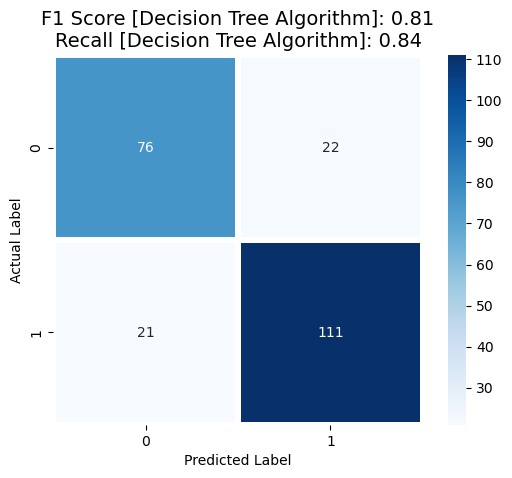

In [114]:
# Decision Tree
# Decision Tree
# Decision Tree



import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate numerical and encoded categorical variables
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Cross-validation
cv_results = cross_validate(dt_classifier, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
dt_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = dt_classifier.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of Decision Tree Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_dt = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_dt = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_dt = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_dt, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [Decision Tree Algorithm]: {f1_score_dt:.2f}\n'
          f'Recall [Decision Tree Algorithm]: {recall_dt:.2f}', size=14, color='black')
plt.show()


C:\Users\maged\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

Accuracy of AdaBoost Algorithm:  85.65217391304348
Training time: 0.1205 seconds
Testing time: 0.0080 seconds
Cross Validation Results:
Test Scores: [0.82608696 0.85507246 0.82608696 0.82481752 0.83941606]
Mean Test Score: 0.834295990690786


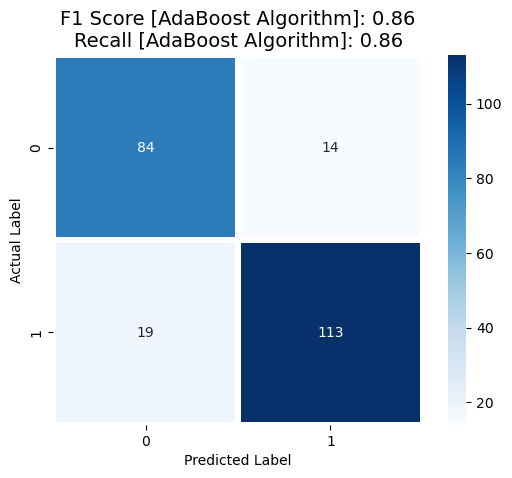

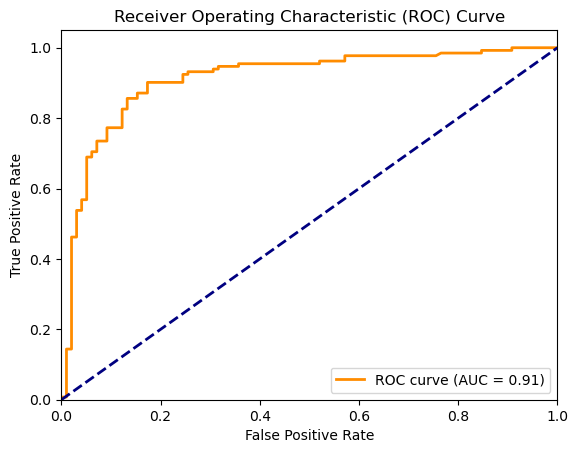

In [117]:
# AdaBoost
# AdaBoost
# AdaBoost


import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate numerical and encoded categorical variables
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()

# Cross-validation
cv_results = cross_validate(adaboost_classifier, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
adaboost_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = adaboost_classifier.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of AdaBoost Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_adaboost = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_adaboost = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_adaboost = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_adaboost, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [AdaBoost Algorithm]: {f1_score_adaboost:.2f}\n'
          f'Recall [AdaBoost Algorithm]: {recall_adaboost:.2f}', size=14, color='black')
plt.show()

# Predict probabilities for test data
y_prob = adaboost_classifier.predict_proba(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\maged\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\maged\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maged\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

Accuracy of Logistic Regression Algorithm:  85.65217391304348
Training time: 0.2255 seconds
Testing time: 0.0000 seconds
Cross Validation Results:
Test Scores: [0.88405797 0.89130435 0.86956522 0.83211679 0.84671533]
Mean Test Score: 0.864751930604041


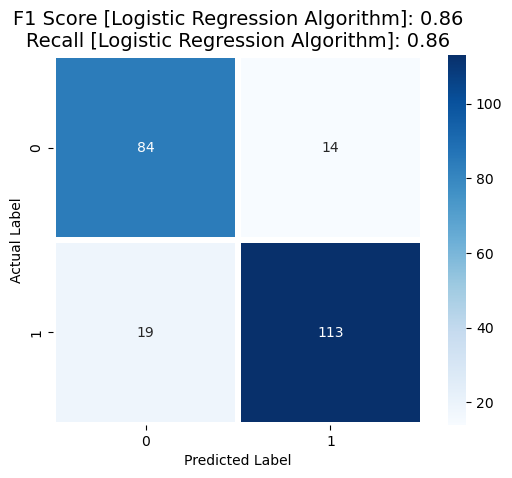

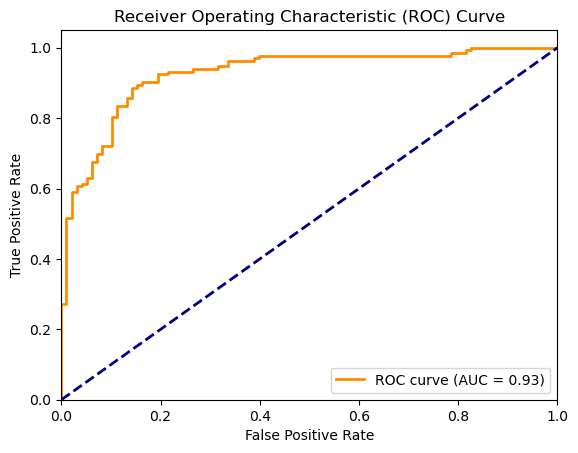

In [125]:
# Logistic Regression
# Logistic Regression
# Logistic Regression


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate numerical and encoded categorical variables
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize Logistic Regression
logistic_regression = LogisticRegression()

# Cross-validation
cv_results = cross_validate(logistic_regression, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
logistic_regression.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = logistic_regression.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of Logistic Regression Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_logistic = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_logistic = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_logistic = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_logistic, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [Logistic Regression Algorithm]: {f1_score_logistic:.2f}\n'
          f'Recall [Logistic Regression Algorithm]: {recall_logistic:.2f}', size=14, color='black')
plt.show()

# Predict probabilities for test data
y_prob = logistic_regression.predict_proba(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\maged\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        98
           1       0.76      0.71      0.74       132

    accuracy                           0.71       230
   macro avg       0.70      0.71      0.71       230
weighted avg       0.71      0.71      0.71       230

Accuracy of SVM Algorithm:  70.86956521739131
Training time: 0.1532 seconds
Testing time: 0.0167 seconds
Cross Validation Results:
Test Scores: [0.73913043 0.7173913  0.69565217 0.72262774 0.71532847]
Mean Test Score: 0.7180260234846081


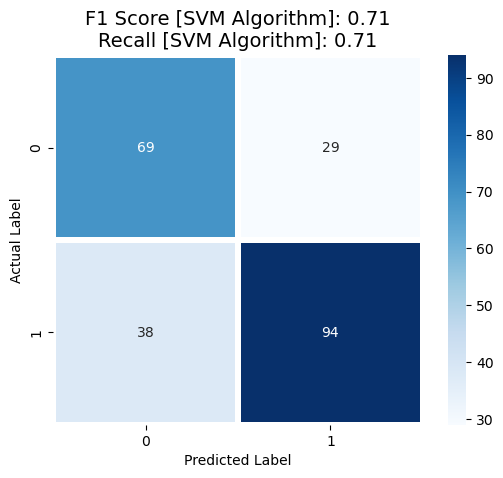

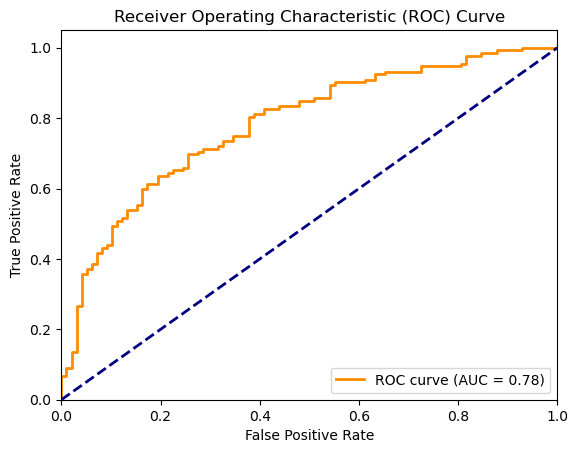

In [126]:
# SVM (Support Vector Machine)
# SVM (Support Vector Machine)
# SVM (Support Vector Machine)


import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate numerical and encoded categorical variables
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True)

# Cross-validation
cv_results = cross_validate(svm_classifier, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = svm_classifier.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix all
print('Accuracy of SVM Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_svm = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix all
cm_svm = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_svm = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_svm, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [SVM Algorithm]: {f1_score_svm:.2f}\n'
          f'Recall [SVM Algorithm]: {recall_svm:.2f}', size=14, color='black')
plt.show()

# Predict probabilities for test data
y_prob = svm_classifier.predict_proba(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\maged\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\maged\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maged\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.88      0.85      0.86       132

    accuracy                           0.85       230
   macro avg       0.84      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

Accuracy of MLP Neural Network Algorithm:  84.78260869565217
Training time: 2.3167 seconds
Testing time: 0.0094 seconds
Cross Validation Results:
Test Scores: [0.85507246 0.84782609 0.86231884 0.81751825 0.86861314]
Mean Test Score: 0.8502697556331323


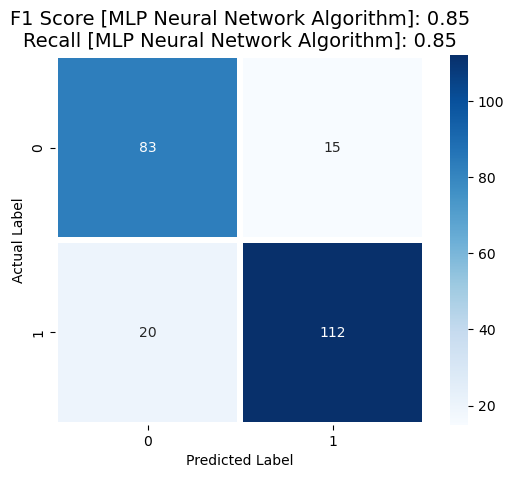

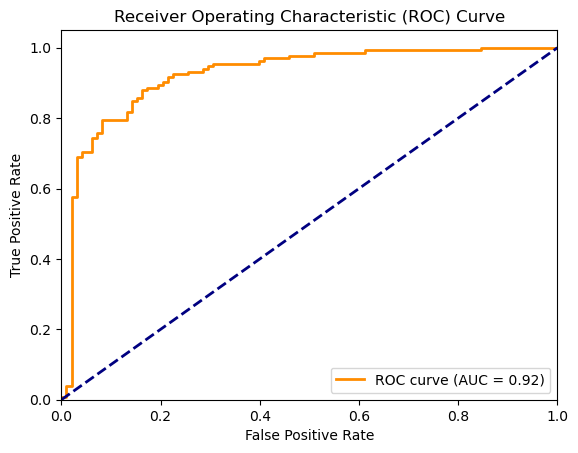

In [122]:
# MLP Neural Network Algorithm (Multi-layer Perceptron)
# MLP Neural Network Algorithm (Multi-layer Perceptron)
# MLP Neural Network Algorithm (Multi-layer Perceptron)


import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import time

# Load the dataset
data = pd.read_csv("C:/ALL/McMaster M.Eng. Study/Winter Term (Fourth) 2024/SEP 6DM3 - Data Mining/Course Project/HF.csv")

# Assuming 'HeartDisease' is the target variable
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names(categorical_cols)

# Concatenate numerical and encoded categorical variables
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize MLPClassifier
mlp_classifier = MLPClassifier()

# Cross-validation
cv_results = cross_validate(mlp_classifier, X_train, y_train, cv=5)

# Fitting training data
start_time = time.time()
mlp_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predicted data
start_time = time.time()
y_predicted = mlp_classifier.predict(X_test)
testing_time = time.time() - start_time

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of MLP Neural Network Algorithm: ', metrics.accuracy_score(y_test, y_predicted) * 100)

# F1 Score
f1_score_mlp = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix all - checked
cm_mlp = metrics.confusion_matrix(y_test, y_predicted)

# Recall
recall_mlp = metrics.recall_score(y_test, y_predicted)

# Print computational times
print(f"Training time: {training_time:.4f} seconds")
print(f"Testing time: {testing_time:.4f} seconds")

# Print cross-validation results
print("Cross Validation Results:")
print(f"Test Scores: {cv_results['test_score']}")
print(f"Mean Test Score: {np.mean(cv_results['test_score'])}")

# Heatmap confusion matrix
sns.heatmap(cm_mlp, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show F1 Score and Recall
plt.title(f'F1 Score [MLP Neural Network Algorithm]: {f1_score_mlp:.2f}\n'
          f'Recall [MLP Neural Network Algorithm]: {recall_mlp:.2f}', size=14, color='black')
plt.show()

# Predict probabilities for test data
y_prob = mlp_classifier.predict_proba(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


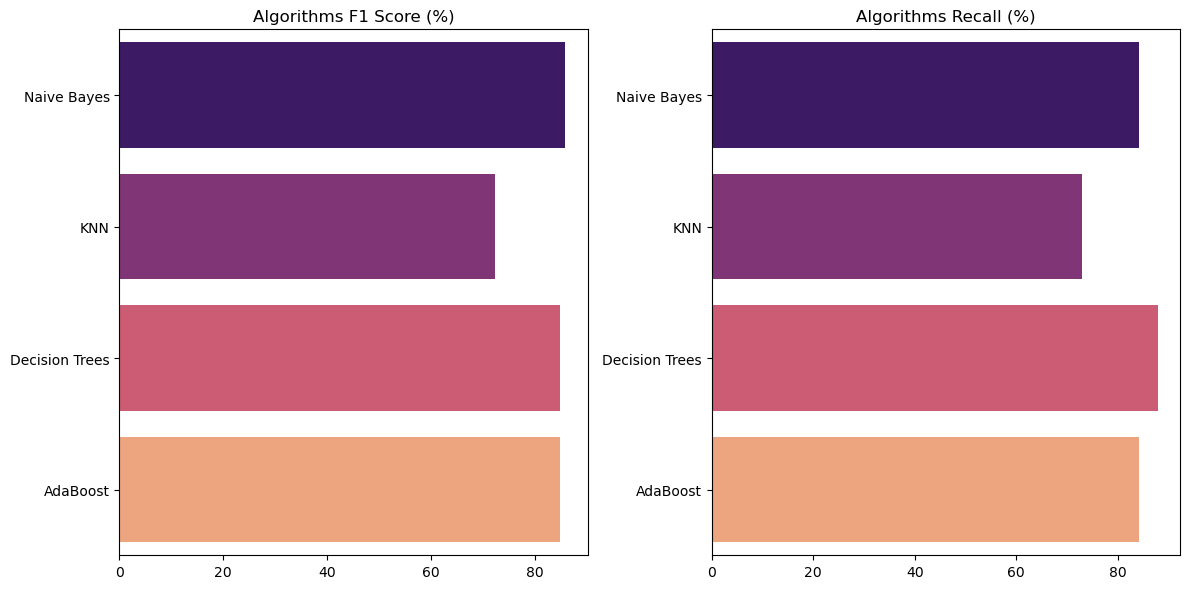

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert F1 scores and recall values to percentage
model_f1_scores_percent = [score * 100 for score in model_f1_scores]
recalls_percent = [recall * 100 for recall in recalls]

# Create figure
plt.figure(figsize=(12, 6))

# Barplot for F1 scores
plt.subplot(1, 2, 1)
sns.barplot(x=model_f1_scores_percent, y=model_names, palette='magma')
plt.title('Algorithms F1 Score (%)')

# Barplot for recall
plt.subplot(1, 2, 2)
sns.barplot(x=recalls_percent, y=model_names, palette='magma')
plt.title('Algorithms Recall (%)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


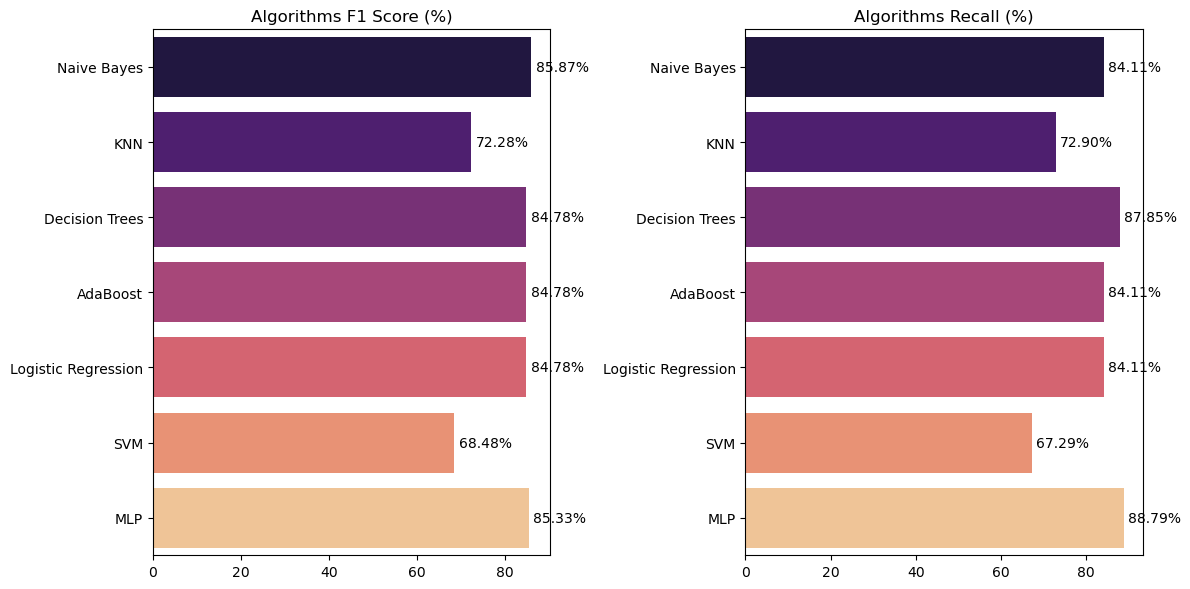

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# F1 scores and recall for each algorithm
model_f1_scores = [f1_score_NB, f1_score_knn, f1_score_dt, f1_score_adaboost, f1_score_logistic, f1_score_svm, f1_score_mlp]
recalls = [recall_NB, recall_knn, recall_dt, recall_adaboost, recall_logistic, recall_svm, recall_mlp]
model_names = ['Naive Bayes', 'KNN', 'Decision Trees', 'AdaBoost', 'Logistic Regression', 'SVM', 'MLP']

# Convert F1 scores and recall values to percentage
model_f1_scores_percent = [score * 100 for score in model_f1_scores]
recalls_percent = [recall * 100 for recall in recalls]

# Create figure
plt.figure(figsize=(12, 6))

# Barplot for F1 scores
plt.subplot(1, 2, 1)
sns.barplot(x=model_f1_scores_percent, y=model_names, palette='magma')
plt.title('Algorithms F1 Score (%)')

# Add percentage labels
for i, score in enumerate(model_f1_scores_percent):
    plt.text(score + 1, i, f'{score:.2f}%', va='center')

# Barplot for recall
plt.subplot(1, 2, 2)
sns.barplot(x=recalls_percent, y=model_names, palette='magma')
plt.title('Algorithms Recall (%)')

# Add percentage labels
for i, recall in enumerate(recalls_percent):
    plt.text(recall + 1, i, f'{recall:.2f}%', va='center')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [127]:
import pandas as pd

# Create a DataFrame for the F1 scores and recalls
data = {
    'Model': model_names,
    'F1 Score (%)': model_f1_scores_percent,
    'Recall (%)': recalls_percent
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                 Model  F1 Score (%)  Recall (%)
0          Naive Bayes     85.869565   84.112150
1                  KNN     72.282609   72.897196
2       Decision Trees     84.782609   87.850467
3             AdaBoost     84.782609   84.112150
4  Logistic Regression     84.782609   84.112150
5                  SVM     68.478261   67.289720
6                  MLP     85.326087   88.785047


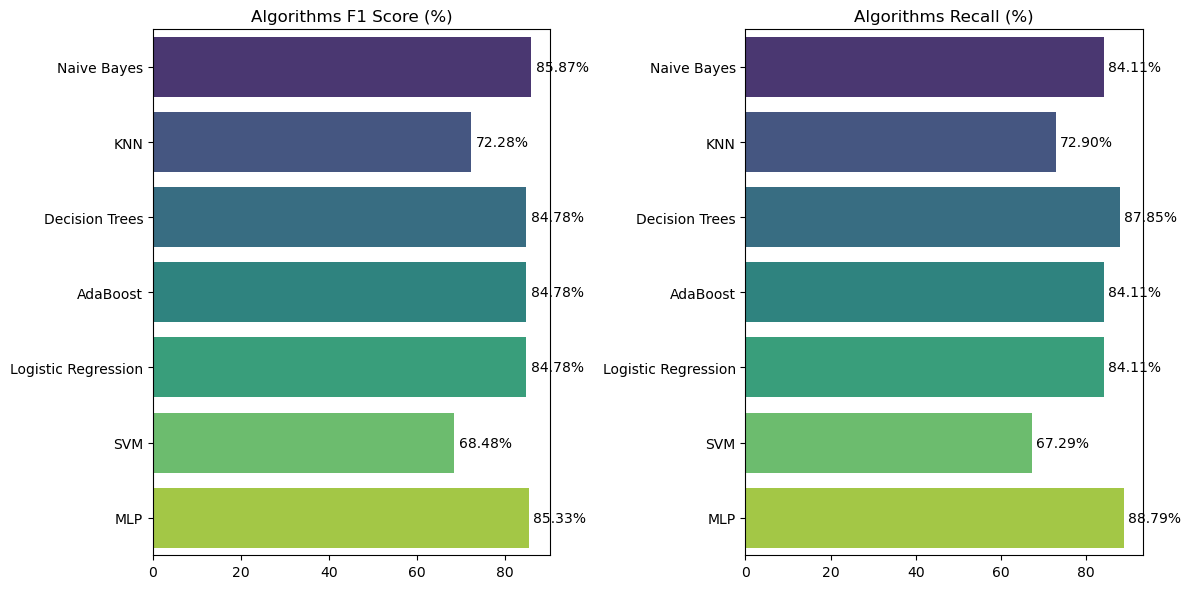

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# F1 scores and recall for each algorithm
model_f1_scores = [f1_score_NB, f1_score_knn, f1_score_dt, f1_score_adaboost, f1_score_logistic, f1_score_svm, f1_score_mlp]
recalls = [recall_NB, recall_knn, recall_dt, recall_adaboost, recall_logistic, recall_svm, recall_mlp]
model_names = ['Naive Bayes', 'KNN', 'Decision Trees', 'AdaBoost', 'Logistic Regression', 'SVM', 'MLP']

# Convert F1 scores and recall values to percentage
model_f1_scores_percent = [score * 100 for score in model_f1_scores]
recalls_percent = [recall * 100 for recall in recalls]

# Create figure
plt.figure(figsize=(12, 6))

# Barplot for F1 scores
plt.subplot(1, 2, 1)
sns.barplot(x=model_f1_scores_percent, y=model_names, palette='viridis')
plt.title('Algorithms F1 Score (%)')

# Add percentage labels
for i, score in enumerate(model_f1_scores_percent):
    plt.text(score + 1, i, f'{score:.2f}%', va='center')

# Barplot for recall
plt.subplot(1, 2, 2)
sns.barplot(x=recalls_percent, y=model_names, palette='viridis')
plt.title('Algorithms Recall (%)')

# Add percentage labels
for i, recall in enumerate(recalls_percent):
    plt.text(recall + 1, i, f'{recall:.2f}%', va='center')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


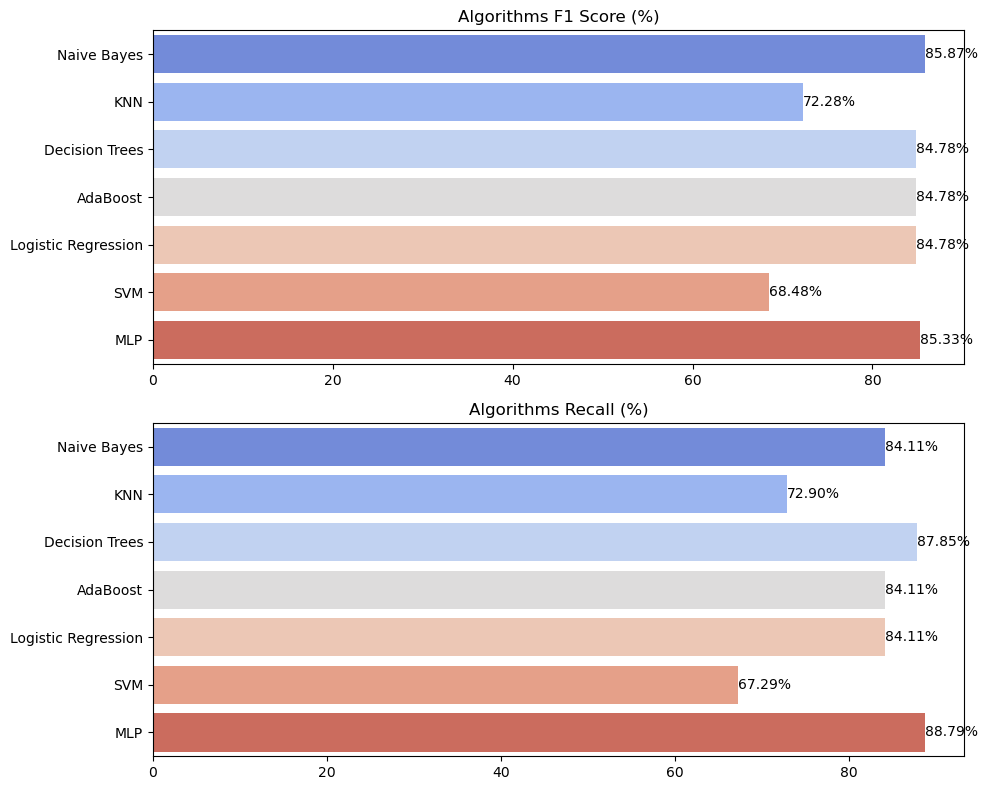

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# F1 scores and recall for each algorithm
model_f1_scores = [f1_score_NB, f1_score_knn, f1_score_dt, f1_score_adaboost, f1_score_logistic, f1_score_svm, f1_score_mlp]
recalls = [recall_NB, recall_knn, recall_dt, recall_adaboost, recall_logistic, recall_svm, recall_mlp]
model_names = ['Naive Bayes', 'KNN', 'Decision Trees', 'AdaBoost', 'Logistic Regression', 'SVM', 'MLP']

# Convert F1 scores and recall values to percentage
model_f1_scores_percent = [score * 100 for score in model_f1_scores]
recalls_percent = [recall * 100 for recall in recalls]

# Create figure
plt.figure(figsize=(10, 8))

# Horizontal barplot for F1 scores
plt.subplot(2, 1, 1)
sns.barplot(x=model_f1_scores_percent, y=model_names, palette='coolwarm')
plt.title('Algorithms F1 Score (%)')

# Add percentage labels
for i, score in enumerate(model_f1_scores_percent):
    plt.text(score, i, f'{score:.2f}%', ha='left', va='center')

# Horizontal barplot for recall
plt.subplot(2, 1, 2)
sns.barplot(x=recalls_percent, y=model_names, palette='coolwarm')
plt.title('Algorithms Recall (%)')

# Add percentage labels
for i, recall in enumerate(recalls_percent):
    plt.text(recall, i, f'{recall:.2f}%', ha='left', va='center')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [101]:
#Kind Regards, Maged Eid, SEP 6DM3. Thank You.